In [1]:
# Introduction to Matplotlib and Line Plots

In [2]:
import numpy as np
import pandas as pd

In [3]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

In [4]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [5]:
df_can.set_index('Country', inplace=True)

In [6]:
# let's declare a variable that will allow us to easily call upon the full range of years:

years = list(map(str, range(1980, 2014)))

In [7]:
# Visualizing Data using Matplotlib

In [8]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
# optional: apply a style to Matplotlib.

print(plt.style.available)
mpl.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [10]:
# Plotting in pandas

# Fortunately, pandas has a built-in implementation of Matplotlib that we can use. 

# Plotting in pandas is as simple as appending a `.plot()` method to a series or dataframe.

In [11]:
# Question: Plot a line graph of immigration from Haiti using `df.plot()`

In [12]:
#creating data series
haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

<AxesSubplot:>

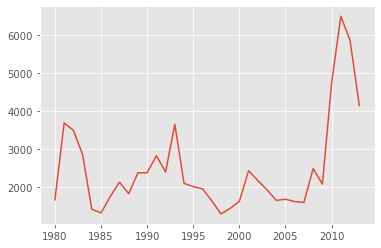

In [13]:
# Next, we will plot a line plot by appending `.plot()` to the `haiti` dataframe.

haiti.plot()

In [14]:
# Note that pandas automatically populated the x-axis with the index values (years), and the y-axis with the column values (population).


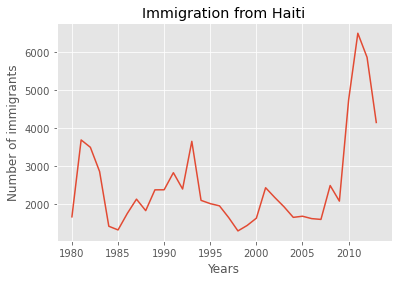

In [15]:
# Also, let's label the x and y axis using `plt.title()`, `plt.ylabel()`, and `plt.xlabel()` as follows:

haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

In [16]:
# Let's annotate the 2010 spike in the plot by using the `plt.text()` method.

In [17]:
# However, notice that years are of type string. Let's change the type of the index values to integer first.

haiti.index = haiti.index.map(int) 

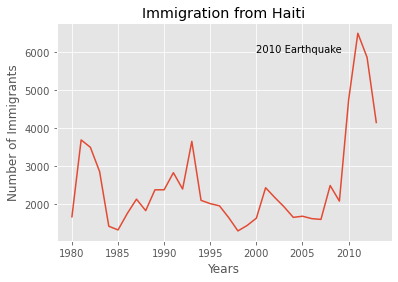

In [18]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show() 

In [19]:
# Quick note on x and y values in `plt.text(x, y, label)`:
    
     # Since the x-axis (years) is type 'integer', we specified x as a year. 
     # The y axis (number of immigrants) is type 'integer', so we can just specify the value y = 6000.
    
        # plt.text(2000, 6000, '2010 Earthquake') # years stored as type int


    # If the years were stored as type 'string', we would need to specify x as the index position of the year. 
    
    # Eg 20th index is year 2000 since it is the 20th year with a base year of 1980.

        # plt.text(20, 6000, '2010 Earthquake') # years stored as type int



In [20]:
# Question: Let's compare the number of immigrants from India and China from 1980 to 2013.

In [21]:
# Step 1: Get the data set for China and India, and display the dataframe.
df_CI = df_can.loc[['India', 'China'], years]
df_CI

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


<AxesSubplot:xlabel='Country'>

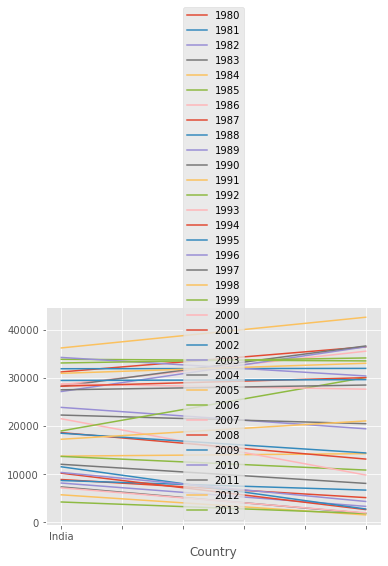

In [22]:
# Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

df_CI.plot(kind='line')

In [23]:
# That doesn't look right...

# Recall that pandas plots the indices on the x-axis and the columns as individual lines on the y-axis. 

# Since `df_CI` is a dataframe with the `country` as the index and `years` as the columns, we must first transpose the dataframe using `transpose()` method to swap the row and columns.

df_CI = df_CI.transpose()
df_CI.head()

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


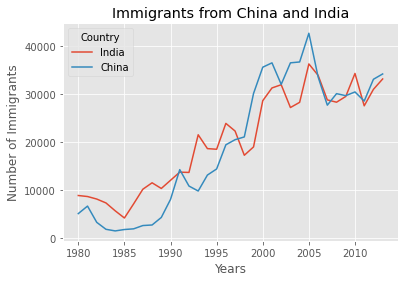

In [24]:
df_CI.index = df_CI.index.map(int) # let's change the index values of df_CI to type integer for plotting
df_CI.plot(kind='line')

plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In [25]:
# Note: How come we didn't need to transpose Haiti's dataframe before plotting (like we did for df_CI)?

# R// That's because `haiti` is a series as opposed to a dataframe, and has the years as its indices as shown below.

print(type(haiti))
print(haiti.head(5))

<class 'pandas.core.series.Series'>
1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object


In [26]:
# Question: Compare the trend of top 5 countries that contributed the most to immigration to Canada.

In [27]:
# Step 1: Get the dataset. Recall that we created a Total column that calculates cumulative immigration by country. 
    
    # We will sort on this column to get our top 5 countries using pandas sort_values() method. (inplace = True) saves the changes to the original df_can dataframe
    
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

    # get the top 5 entries
    
df_top5 = df_can.head(5)

    # transpose the dataframe
    
df_top5 = df_top5[years].transpose() 
print(df_top5)

Country  India  China  United Kingdom of Great Britain and Northern Ireland  \
1980      8880   5123                                              22045      
1981      8670   6682                                              24796      
1982      8147   3308                                              20620      
1983      7338   1863                                              10015      
1984      5704   1527                                              10170      
1985      4211   1816                                               9564      
1986      7150   1960                                               9470      
1987     10189   2643                                              21337      
1988     11522   2758                                              27359      
1989     10343   4323                                              23795      
1990     12041   8076                                              31668      
1991     13734  14255                               

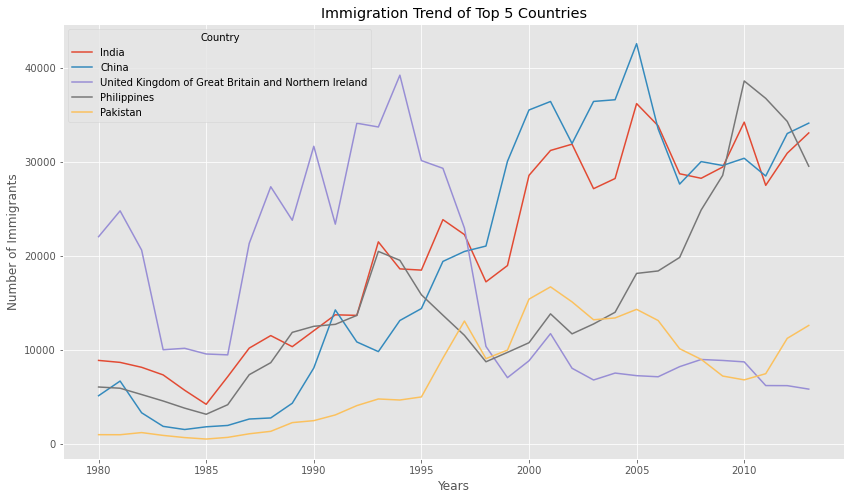

In [28]:
#Step 2: Plot the dataframe. To make the plot more readeable, we will change the size using the `figsize` parameter.

df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size


plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')


plt.show()

In [29]:
# There are many other plotting styles available other than the default Line plot, all of which can be accessed by passing `kind` keyword to `plot()`. 

# The full list of available plots are as follows:

# `bar` for vertical bar plots
# `barh` for horizontal bar plots
# `hist` for histogram
# `box` for boxplot
# `kde` or `density` for density plots
# `area` for area plots
# `pie` for pie plots
# `scatter` for scatter plots
# `hexbin` for hexbin plot